<a href="https://colab.research.google.com/github/patil202/Data-Science-Projects/blob/main/Blacklane_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/drive/MyDrive/Blacklane/Newdata.xlsx')  # Replace with the actual file name


# EDA

In [ ]:
data.head()


,Ride City,Booking Number,Partner Account Number,Chauffeur ID,Pickup Time [Local],Chauffeur Arrived At Pickup At [Local],flight arrival delay time (Minutes),Pickup Location Type,Driver Rating,Pickup Latitude,Pickup Longitude,chauffeur arrived at pickup button press latitude,chauffeur arrived at pickup button press longitude
0,London,100013,633528,222,2024-11-03 13:15:00,2024-11-03 13:08:37,8.0,airport,NaN,51.471554,-0.454222,51.469601,-0.451498
1,London,100083,626529,57,2024-11-03 21:30:00,2024-11-03 20:11:29,-23.0,airport,NaN,51.471554,-0.454222,51.535801,-0.321589
2,London,100151,642147,531,2024-11-03 14:57:00,2024-11-03 13:48:47,42.0,airport,NaN,51.471554,-0.454222,51.471298,-0.456151
3,London,100157,632253,179,2024-11-03 19:30:00,2024-11-03 19:27:48,6.0,airport,NaN,51.471554,-0.454222,51.471699,-0.457259
4,Paris,100187,641505,514,2024-11-03 03:40:00,2024-11-03 03:35:44,NaN,NaN,NaN,48.869083,2.332494,48.869202,2.332570


In [ ]:
data.shape

(1176, 13)

In [ ]:
data.dtypes

,0
Ride City,object
Booking Number,int64
Partner Account Number,int64
Chauffeur ID,int64
Pickup Time [Local],datetime64[ns]
Chauffeur Arrived At Pickup At [Local],datetime64[ns]
flight arrival delay time (Minutes),float64
Pickup Location Type,object
Driver Rating,float64
Pickup Latitude,float64


In [ ]:
data.describe()

,Booking Number,Partner Account Number,Chauffeur ID,Pickup Time [Local],Chauffeur Arrived At Pickup At [Local],flight arrival delay time (Minutes),Driver Rating,Pickup Latitude,Pickup Longitude,chauffeur arrived at pickup button press latitude,chauffeur arrived at pickup button press longitude
count,1176.000000,1176.000000,1176.000000,1176,1176,700.000000,303.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,149789.799320,634505.359694,318.026361,2024-11-03 12:36:29.875850240,2024-11-03 12:17:30.090136064,-2.205714,4.920792,44.358247,9.252313,44.356464,9.249612
min,100013.000000,598722.000000,1.000000,2024-11-03 00:02:00,2024-11-02 23:24:42,-85.000000,1.000000,-33.969921,-9.443296,-33.969700,-9.443190
25%,123400.000000,631201.500000,154.750000,2024-11-03 08:30:00,2024-11-03 08:19:16.249999872,-16.000000,5.000000,41.303154,-0.454222,41.288374,-0.452458
50%,150026.000000,637161.000000,317.000000,2024-11-03 12:00:00,2024-11-03 11:43:31.500000,-4.000000,5.000000,51.156818,0.126519,51.156551,0.127059
75%,175339.250000,640452.000000,475.000000,2024-11-03 16:56:15,2024-11-03 16:30:20,6.000000,5.000000,51.487867,12.297698,51.493050,12.313975
max,199867.000000,647094.000000,646.000000,2024-11-04 00:00:00,2024-11-04 00:18:14,285.000000,5.000000,61.493172,58.328251,61.493099,58.327999
std,29220.502458,9636.143225,186.832537,NaN,NaN,28.513039,0.508533,14.406933,17.684132,14.407959,17.684984


In [ ]:
data.isnull().sum()

,0
Ride City,0
Booking Number,0
Partner Account Number,0
Chauffeur ID,0
Pickup Time [Local],0
Chauffeur Arrived At Pickup At [Local],0
flight arrival delay time (Minutes),476
Pickup Location Type,43
Driver Rating,873
Pickup Latitude,0


# Condition 1: Late Arrivals
Create a new column #is_late that flags rides where the chauffeur arrived later than the scheduled pickup time.

In [ ]:
from geopy.distance import geodesic

In [ ]:

data['Pickup Time [Local]'] = pd.to_datetime(data['Pickup Time [Local]'])
data['Chauffeur Arrived At Pickup At [Local]'] = pd.to_datetime(data['Chauffeur Arrived At Pickup At [Local]'])


In [ ]:

data['is_late'] = (data['Chauffeur Arrived At Pickup At [Local]'] > data['Pickup Time [Local]'])

In [ ]:
data.head(5)

,Ride City,Booking Number,Partner Account Number,Chauffeur ID,Pickup Time [Local],Chauffeur Arrived At Pickup At [Local],flight arrival delay time (Minutes),Pickup Location Type,Driver Rating,Pickup Latitude,Pickup Longitude,chauffeur arrived at pickup button press latitude,chauffeur arrived at pickup button press longitude,is_late
0,London,100013,633528,222,2024-11-03 13:15:00,2024-11-03 13:08:37,8.0,airport,NaN,51.471554,-0.454222,51.469601,-0.451498,False
1,London,100083,626529,57,2024-11-03 21:30:00,2024-11-03 20:11:29,-23.0,airport,NaN,51.471554,-0.454222,51.535801,-0.321589,False
2,London,100151,642147,531,2024-11-03 14:57:00,2024-11-03 13:48:47,42.0,airport,NaN,51.471554,-0.454222,51.471298,-0.456151,False
3,London,100157,632253,179,2024-11-03 19:30:00,2024-11-03 19:27:48,6.0,airport,NaN,51.471554,-0.454222,51.471699,-0.457259,False
4,Paris,100187,641505,514,2024-11-03 03:40:00,2024-11-03 03:35:44,NaN,NaN,NaN,48.869083,2.332494,48.869202,2.332570,False


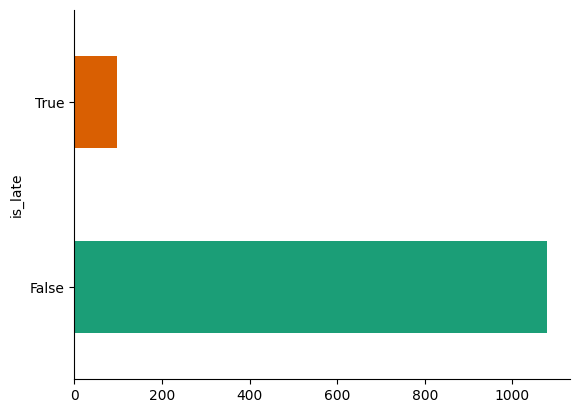

In [ ]:
# @title is_late

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('is_late').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

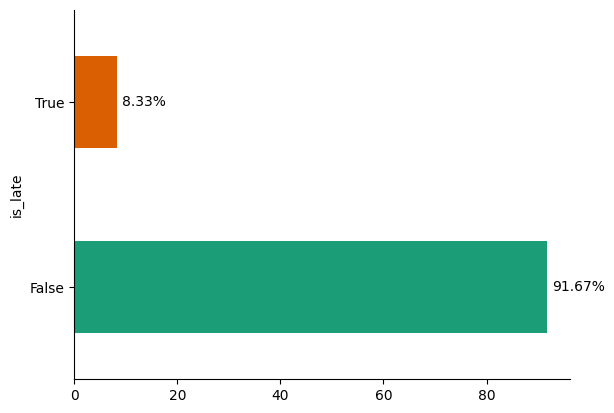

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

counts = data.groupby('is_late').size()
percentages = (counts / counts.sum()) * 100

ax = percentages.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# add precentage
for i, v in enumerate(percentages):
    ax.text(v + 1, i, f'{v:.2f}%', va='center')

# Hide top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


# Condition 2: Distance from Pickup Point

In [ ]:
 # Define the functions
def calculate_distance(row):
    pickup_coords = (row['Pickup Latitude'], row['Pickup Longitude'])
    arrived_coords = (row['chauffeur arrived at pickup button press latitude'], row['chauffeur arrived at pickup button press longitude'])
    return geodesic(pickup_coords, arrived_coords).km

data['distance_from_pickup'] = data.apply(calculate_distance, axis=1)

data['is_far_from_pickup'] = data['distance_from_pickup'] > 1.5


In [ ]:
data.head(2)

,Ride City,Booking Number,Partner Account Number,Chauffeur ID,Pickup Time [Local],Chauffeur Arrived At Pickup At [Local],flight arrival delay time (Minutes),Pickup Location Type,Driver Rating,Pickup Latitude,Pickup Longitude,chauffeur arrived at pickup button press latitude,chauffeur arrived at pickup button press longitude,is_late,Late Arrival,distance_from_pickup,is_far_from_pickup
0,London,100013,633528,222,2024-11-03 13:15:00,2024-11-03 13:08:37,8.0,airport,NaN,51.471554,-0.454222,51.469601,-0.451498,False,False,0.288175,False
1,London,100083,626529,57,2024-11-03 21:30:00,2024-11-03 20:11:29,-23.0,airport,NaN,51.471554,-0.454222,51.535801,-0.321589,False,False,11.657882,True
2,London,100151,642147,531,2024-11-03 14:57:00,2024-11-03 13:48:47,42.0,airport,NaN,51.471554,-0.454222,51.471298,-0.456151,False,False,0.137019,False
3,London,100157,632253,179,2024-11-03 19:30:00,2024-11-03 19:27:48,6.0,airport,NaN,51.471554,-0.454222,51.471699,-0.457259,False,False,0.211638,False
4,Paris,100187,641505,514,2024-11-03 03:40:00,2024-11-03 03:35:44,NaN,NaN,NaN,48.869083,2.332494,48.869202,2.332570,False,False,0.014286,False


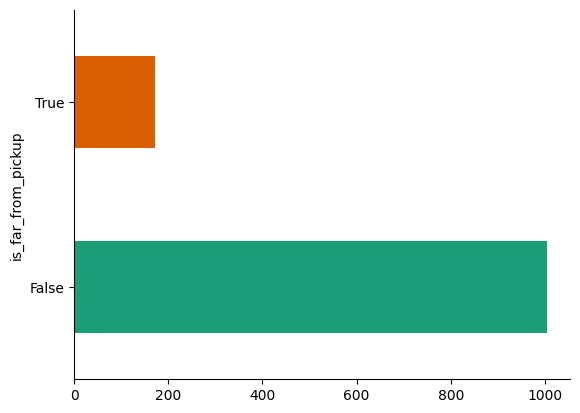

In [ ]:
# @title is_far_from_pickup

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('is_far_from_pickup').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

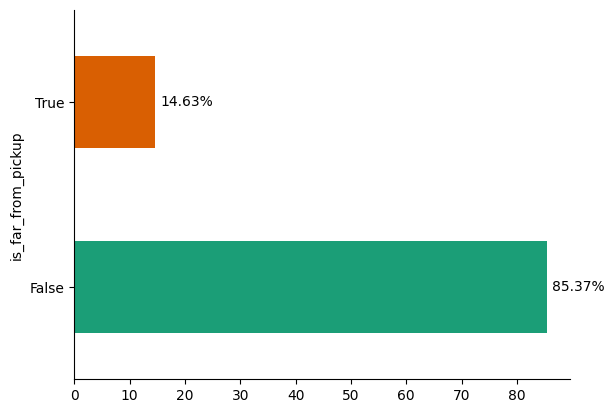

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

counts = data.groupby('is_far_from_pickup').size()
percentages = (counts / counts.sum()) * 100

ax = percentages.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

for i, v in enumerate(percentages):
    ax.text(v + 1, i, f'{v:.2f}%', va='center')

plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()


In [ ]:
data.head()

,Ride City,Booking Number,Partner Account Number,Chauffeur ID,Pickup Time [Local],Chauffeur Arrived At Pickup At [Local],flight arrival delay time (Minutes),Pickup Location Type,Driver Rating,Pickup Latitude,Pickup Longitude,chauffeur arrived at pickup button press latitude,chauffeur arrived at pickup button press longitude,is_late,Late Arrival,distance_from_pickup,is_far_from_pickup
0,London,100013,633528,222,2024-11-03 13:15:00,2024-11-03 13:08:37,8.0,airport,NaN,51.471554,-0.454222,51.469601,-0.451498,False,False,0.288175,False
1,London,100083,626529,57,2024-11-03 21:30:00,2024-11-03 20:11:29,-23.0,airport,NaN,51.471554,-0.454222,51.535801,-0.321589,False,False,11.657882,True
2,London,100151,642147,531,2024-11-03 14:57:00,2024-11-03 13:48:47,42.0,airport,NaN,51.471554,-0.454222,51.471298,-0.456151,False,False,0.137019,False
3,London,100157,632253,179,2024-11-03 19:30:00,2024-11-03 19:27:48,6.0,airport,NaN,51.471554,-0.454222,51.471699,-0.457259,False,False,0.211638,False
4,Paris,100187,641505,514,2024-11-03 03:40:00,2024-11-03 03:35:44,NaN,NaN,NaN,48.869083,2.332494,48.869202,2.332570,False,False,0.014286,False


In [ ]:
data.to_csv('modified_data.csv', index=False)

In [ ]:
from google.colab import files
files.download('modified_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>